fovy: 0.8569566627292158
[[1.12088828e+03 0.00000000e+00 2.56000000e+02]
 [0.00000000e+00 1.12088828e+03 2.56000000e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
[[ 1.   0.   0.  -0. ]
 [-0.  -1.  -0.  -0. ]
 [-0.  -0.  -1.   2.5]]


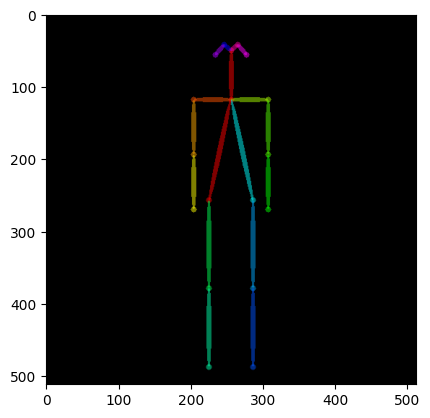

In [2]:
from cam_utils import orbit_camera
from gs_renderer import MiniCam
from openpose_utils import *
import cv2
import numpy as np

T_pose_keypoints = np.array(
    [
        [0, 158, 14],
        [0, 138, 0],
        [-17, 138, 0],
        [-17, 113, 0],
        [-17, 88, 0],
        [17, 138, 0],
        [17, 113, 0],
        [17, 88, 0],
        [-10, 92, 0],
        [-10, 52, 0],
        [-10, 16, 0],
        [10, 92, 0],
        [10, 52, 0],
        [10, 16, 0],
        [-3, 161, 11],
        [3, 161, 11],
        [-7, 158, 3],
        [7, 158, 3],
    ]
)

normalized_keypoints = mid_and_scale(T_pose_keypoints)

fovy = 49.1
pose = orbit_camera(-0, 0, 2.5)
w2c = np.linalg.inv(pose)
w2c[1:3, :3] *= -1
w2c[:3, 3] *= -1
# print(pose)
cur_cam = MiniCam(
    pose,
    512,
    512,
    np.deg2rad(fovy),
    np.deg2rad(fovy),
    0.01,
    100,
)
print("fovy:", np.deg2rad(fovy))
K = cur_cam.K()
RT = w2c[:3, :]
# focal_length = 500
# fx = focal_length * image_shape[1] / image_shape[0]
# fy = focal_length
# cx, cy = image_shape[1] / 2, image_shape[0] / 2  # 光心
# K = np.array([[fx, 0, cx], [0, fy, cy], [0, 0, 1]])
print(K)
print(RT)
result = draw_openpose_human_pose(normalized_keypoints, (512, 512), K, RT)
# cv2.imwrite("T_pose.jpg", cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
# show result
import matplotlib.pyplot as plt

plt.imshow(result)